In [41]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

from utils import load_dataset, compute_performance_metrics, print_metrics_summary

## Carregamento de dados

Carregamento dos dados que serão utilizados para treino (80%) e teste (20%).

In [2]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(382646, 243) (382646,)
(97300, 243) (97300,)


## Parâmetros de treino

Utilizamos os parâmetros padrões da lib, modificando só o `cache_size` para acelerar o processamento e o `probability` para termos as métricas de estimativas.verificação

In [3]:
svc = SVC(cache_size=4000, probability=True)

In [4]:
svc.fit(x_train, y_train)

SVC(cache_size=2000, probability=True)

In [5]:
y_pred = svc.predict(x_test)

In [6]:
y_pred_proba = svc.predict_proba(x_test)

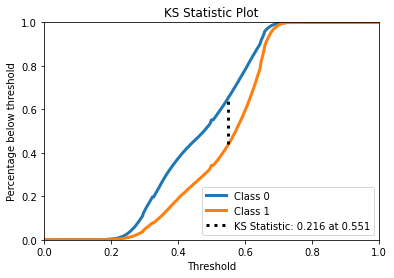


Accuracy:         0.5666
Recall:           0.7069
Precision:        0.4229
F1:               0.5292
AUROC:            0.6487
AUPR:             0.4747


In [43]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Analisando o teste KS, não tivemos um bom resultado comparando com os outros algoritmos.

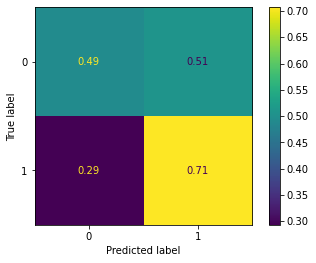

In [44]:
plot_confusion_matrix(svc, x_test, y_test, normalize='true')

Podemos ver pela matriz de confusão que temos uma melhor performance para os conjuntos da classe "1" do que para os conjuntos da classe "0".


É bom também comentar que o processo de treinamento dessa SVC demorou perto de 2 dias no total.